# 공공데이터 과제 2
### 지하철 각 노선별 최대 하차 인원을 막대그래프로 표시하고, 하차인원 출력
- 출근 시간대 : 07:00~08:59
- 각 지하철 노선별 가장 많이 내리는 지하철 역 분석
- 하차 인원은 1,000 단위로 콤마를 찍어서 구분
- 6개의 지하철 역을 막대 그래프로 표시
- Bar chart의 x축은 (노선+지하철 역이름), y축은 인원수
- platform 모듈을 사용하여 한글폰트 지정

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

df=pd.read_csv('subwaytime.csv', encoding='CP949', header=[0, 1])
df.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5_level_0,05:00:00~05:59:59,Unnamed: 7_level_0,06:00:00~06:59:59,Unnamed: 9_level_0,...,23:00:00~23:59:59,Unnamed: 43_level_0,00:00:00~00:59:59,Unnamed: 45_level_0,01:00:00~01:59:59,Unnamed: 47_level_0,02:00:00~02:59:59,Unnamed: 49_level_0,03:00:00~03:59:59,Unnamed: 51_level_0
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
0,Jun-22,1호선,150,서울역,646,24,8433,7694,12608,46963,...,20385,15480,158,1332,1,4,0,1,0,0
1,Jun-22,1호선,151,시청,271,7,3133,4802,3321,23621,...,9254,2938,72,422,0,2,0,0,0,0
2,Jun-22,1호선,152,종각,91,9,4007,3960,3682,22533,...,27781,3590,315,394,0,1,0,0,0,0
3,Jun-22,1호선,153,종로3가,190,12,3882,3261,3570,14038,...,17170,4119,310,843,3,3,0,0,0,0
4,Jun-22,1호선,154,종로5가,34,0,1730,3909,2986,16406,...,6208,2628,98,668,0,0,0,0,0,0


In [6]:
commute_df=df.iloc[:, [1, 3, 11, 13]]
commute_df.head()

,호선명,지하철역,Unnamed: 11_level_0,Unnamed: 13_level_0
,Unnamed: 1_level_1,Unnamed: 3_level_1,하차,하차
0,1호선,서울역,100397,201687
1,1호선,시청,62427,179710
2,1호선,종각,95376,235160
3,1호선,종로3가,25469,68699
4,1호선,종로5가,41304,96113


In [7]:
commute_df.columns=[['호선명', '지하철명', '07:00:00~07:59:59', '08:00:00~08:59:59'],
                   ['Unnamed: 1_level_1', 'Unnamed: 3_level_1', '하차', '하차']]
commute_df.head()

,호선명,지하철명,07:00:00~07:59:59,08:00:00~08:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,하차,하차
0,1호선,서울역,100397,201687
1,1호선,시청,62427,179710
2,1호선,종각,95376,235160
3,1호선,종로3가,25469,68699
4,1호선,종로5가,41304,96113


In [8]:
line_df=commute_df[commute_df[('호선명', 'Unnamed: 1_level_1')]=='1호선']
line_df

,호선명,지하철명,07:00:00~07:59:59,08:00:00~08:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,하차,하차
0,1호선,서울역,100397,201687
1,1호선,시청,62427,179710
2,1호선,종각,95376,235160
3,1호선,종로3가,25469,68699
4,1호선,종로5가,41304,96113
5,1호선,동대문,12675,22464
6,1호선,신설동,23149,56781
7,1호선,제기동,19135,39898
8,1호선,청량리(서울시립대입구),17531,35718


In [10]:
sum_line_df=line_df.sum(axis=1)
sum_line_df

C:\Users\User\AppData\Local\Temp\ipykernel_13568\423784912.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_line_df=line_df.sum(axis=1)


0    302084
1    242137
2    330536
3     94168
4    137417
5     35139
6     79930
7     59033
8     53249
9     32370
dtype: int64

In [13]:
line_max_num=sum_line_df.max()
line_max_num

330536

In [14]:
line_max_idx=sum_line_df.idxmax()
line_max_idx

2

In [19]:
max_line, max_station=df.iloc[2, [1, 3]]
max_line, max_station

('1호선', '종각')

출근 시간대 1호선 최대 하차역은 종각역이고 하차인원은 330,536명입니다.
출근 시간대 2호선 최대 하차역은 역삼역이고 하차인원은 479,969명입니다.
출근 시간대 3호선 최대 하차역은 양재(서초구청)역이고 하차인원은 331,279명입니다.
출근 시간대 4호선 최대 하차역은 충무로역이고 하차인원은 208,776명입니다.
출근 시간대 5호선 최대 하차역은 여의도역이고 하차인원은 352,602명입니다.
출근 시간대 6호선 최대 하차역은 공덕역이고 하차인원은 134,342명입니다.
출근 시간대 7호선 최대 하차역은 가산디지털단지역이고 하차인원은 486,420명입니다.


C:\Users\User\AppData\Local\Temp\ipykernel_13568\3129343322.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_line_df=line_df.sum(axis=1)


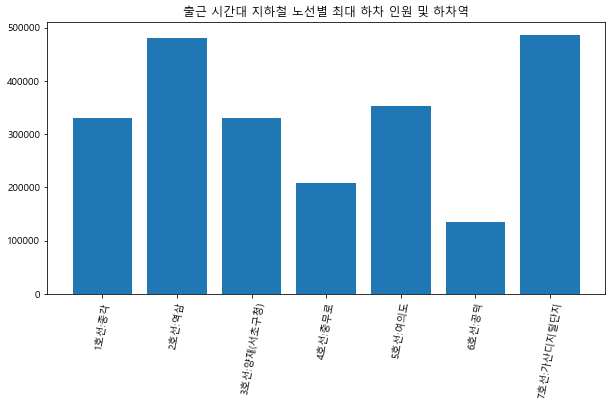

In [29]:
result=[]
x_ticks=[]

for i in range(1, 8):
    line_df=commute_df[commute_df[('호선명', 'Unnamed: 1_level_1')]==str(i)+'호선']
    sum_line_df=line_df.sum(axis=1)
    
    max_num=sum_line_df.max()
    result.append(max_num)
    
    max_idx=sum_line_df.idxmax()
    
    max_line, max_station=df.iloc[max_idx, [1, 3]]
    x_ticks.append('{}:{}'.format(max_line, max_station))
    
    print('출근 시간대 {} 최대 하차역은 {}역이고 하차인원은 {:,}명입니다.'.format(max_line, max_station, max_num))
    
plt.figure(figsize=(10, 5))
plt.bar(range(7), result)
plt.xticks(range(7), x_ticks, rotation=80)
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
plt.show()


if platform.system()=='Windows':
        plt.rc('font', family='Malgun Gothic', size=10)
else:
    plt.rc('font', family='AppleGothic', size=8)